# **Not an ideal network**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

importing the required  modules .
Keras- A deep learning module built upon tensorflow library 
numpy -a python computtaion library for linear algebra


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

Loading the Mnist dataset from keras datasets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Plotting image from dataset using matplotlib a plotting libary in python

(60000, 28, 28)


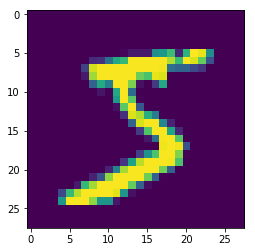

In [20]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshaping  784 array into grey scale image form 28*28*1 and using it as Xtest and Xtrain separating datasets for training and validation

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Normalizing The pixel values by dividing them by 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [23]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Converting the classes values to categorical (One hot encoding)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [25]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Writing a model

In [33]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#rec field 3*3    input-shape 28*28*1
model.add(Convolution2D(64, 3, 3, activation='relu'))
#rec field 5*5    input-shape 26*26*32
model.add(Convolution2D(128, 3, 3, activation='relu'))
#rec field 7*7    input-shape 24*24*64

model.add(MaxPooling2D(pool_size=(2, 2)))
#rec field 9*9    input-shape 22*22*128

model.add(Convolution2D(256, 3, 3, activation='relu'))
#rec field 18*18    input-shape 11*11*128

model.add(Convolution2D(512, 3, 3, activation='relu'))
#rec field 20*20    input-shape 9*9*256

model.add(Convolution2D(1024, 3, 3, activation='relu'))
#rec field 22*22    input-shape 7*7*512

model.add(Convolution2D(2048, 3, 3, activation='relu'))
#rec field 24*24    input-shape 5*5*1024

model.add(Convolution2D(10, 3, 3, activation='relu'))
#rec field 26*26    input-shape 3*3*2048


model.add(Flatten())
#rec field 28*28    input-shape 1*1*2048

model.add(Activation('softmax'))
#rec field 28*28    input-shape 2048


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call 

Compiling the model ,specifying the optimizer -(The weight nudging technique) as adam and loss as categorical cross entropy 

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

train the model keeping the batch sizes as 32 

In [35]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 116s 2ms/step - loss: 2.3027 - acc: 0.0985
Epoch 2/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - a

In [0]:
predictions=[np.argmax(i) for i in model.predict(X_test)]

In [39]:
predictions[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

* ` The main defect in the model is with the accuracy being constant ,This is because having relu activation just before the softmax activation and because of these we kind of get bigger positive and similar kind of values and hence we are not able to pick a different value with the softmax classifier ,i.e, everytime our softmax gives a same value as output hence the loss is bigger and same and our backpropagation fails to nudge the parameters correctly.`
* `Network is badly written ,for just the sake of classifying gray scale images of handwritten digits(10 classes) these many parameters are not required.`
  * `After we get 256 or 512 channels we can merge those channels with a 1*1 convolution block which can actually take the channels which carry much more important features for the purpose of classification.and this merging (taking the important channels) can be learnt well by backpropagation.`
  * `We did not use batch normalization here which can help in robustness of the shape and scale of input data.`




In [26]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#rec field 3*3    input-shape 28*28*1
model.add(Convolution2D(64, 3, 3, activation='relu'))
#rec field 5*5    input-shape 26*26*32
model.add(Convolution2D(128, 3, 3, activation='relu'))
#rec field 7*7    input-shape 24*24*64

model.add(MaxPooling2D(pool_size=(2, 2)))
#rec field 9*9    input-shape 22*22*128

model.add(Convolution2D(256, 3, 3, activation='relu'))
#rec field 18*18    input-shape 11*11*128

model.add(Convolution2D(512, 3, 3, activation='relu'))
#rec field 20*20    input-shape 9*9*256

model.add(Convolution2D(1024, 3, 3, activation='relu'))
#rec field 22*22    input-shape 7*7*512

model.add(Convolution2D(2048, 3, 3, activation='relu'))
#rec field 24*24    input-shape 5*5*1024

model.add(Convolution2D(10, 3, 3))
#rec field 26*26    input-shape 3*3*2048


model.add(Flatten())
#rec field 28*28    input-shape 1*1*2048

model.add(Activation('softmax'))
#rec field 28*28    input-shape 2048


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call 

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [29]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1557 - acc: 0.9508
Epoch 2/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0535 - acc: 0.9843
Epoch 3/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0422 - acc: 0.9882
Epoch 4/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0348 - acc: 0.9900
Epoch 5/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0294 - acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0246 - acc: 0.9926
Epoch 7/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0223 - acc: 0.9936
Epoch 8/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0197 - acc: 0.9941
Epoch 9/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0202 - acc: 0.9945
Epoch 10/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0172 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
predictions=[np.argmax(i) for i in model.predict(X_test)]

In [32]:
predictions[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [0]:
y_pred = model.predict(X_test)

In [41]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]
